In [1]:
import numpy as np
from sympy import symbols, Eq, Function,UnevaluatedExpr, Mul, Rational, sqrt, Min
from sympy import Piecewise, nan, N, And, log
from sympy import *
from sympy import N
init_printing()
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import warnings


In [2]:
F_Ed, t_w, h_w, b_f, f_yf, t_f, f_yw, gamma_M1, E, S_S, a, c, epsilon, f_y = symbols(
	'F_Ed t_w h_w b_f f_yf t_f f_yw gamma_M1 E S_S a c epsilon f_y')

k_F, F_cr, m_1, m_2, l_e, l_y, F_y, lambda_F, chi_F, F_Rd, eta_2=symbols('k_F  F_cr  m_1  m_2  l_e  l_y  F_y  lambda_F  chi_F  F_Rd  eta_2')

def k_F_func(Type,**kwargs):
	kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
	if Type == "A":
		expr = 6 + 2 * (h_w / a)**2
	if Type == "B":
		expr = 3.5 + 2 * (h_w / a)**2
	if Type == "C":
		expr = 6 + 2 * ((S_S + c) / h_w)**2
	_eq=Eq(k_F,expr)
	_eq=_eq.subs(kwargs)
	return _eq

def F_cr_func(Type, **kwargs):
    kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    expr=0.9*(k_F*E)*(t_w**3/h_w )
    _eq=Eq(F_cr,expr)
    _eq=_eq.subs(kwargs)
    return _eq
    
def m_1_func(Type, **kwargs):
    kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    expr= f_yf*b_f/(f_yw*t_w)
    _eq=Eq(m_1,expr)
    _eq=_eq.subs(kwargs)
    return _eq

def m_2_func(Type, **kwargs):
    kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    #condlist=[lambda_F>0.5, lambda_F<=0.5]
    #funclist=[0.02*(h_w/t_f)**2, 0]
    #expr = Piecewise(*zip(funclist,condlist))
    expr=0.02*(h_w/t_f)**2
    _eq=Eq(m_2,expr)
    _eq=_eq.subs(kwargs)
    return _eq

#l_y_func(Type, **kwargs)


def l_e_func(Type="C", **kwargs):
    kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    #if Type=="C":
    expr=(k_F*E*t_w**2)/(2*f_yw*h_w)  
    _eq=Eq(l_e,expr)
    _eq=_eq.subs(kwargs)
    return _eq




def l_y_func(Type, **kwargs):
    #kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    if Type=="A" or Type=="B":
        expr=S_S+2*t_f*(1+sqrt(m_1+m_2))
    if Type=="C":
        expr1=l_e+t_f*sqrt(m_1/2+(l_e/t_f)**2+m_2)
        expr2=l_e+t_f*sqrt(m_1+m_2)
        expr=Min(expr1,expr2)
    _eq=Eq(l_y,expr)
    _eq=_eq.subs(kwargs)#.subs(l_e, l_e_expr)
    return _eq

def F_y_func(Type, **kwargs):
    kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    expr=f_yw*t_w*l_y
    _eq=Eq(F_y,expr)
    _eq=_eq.subs(kwargs)
    return _eq

def lambda_F_func(Type, **kwargs):
    kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    expr= sqrt(l_y*t_w*f_yw/F_cr)
    _eq=Eq(lambda_F,expr)
    _eq=_eq.subs(kwargs)
    return _eq

def chi_F_func(Type,**kwargs):
    kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    expr= 0.5/ lambda_F
    _eq=Eq(chi_F,expr)
    _eq=_eq.subs(kwargs)
    return _eq

def F_Rd_func(Type,**kwargs):
    kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    expr=chi_F*F_y/gamma_M1
    _eq=Eq(F_Rd,expr)
    _eq=_eq.subs(kwargs)
    return _eq
    
def eta_2_func(Type,**kwargs):
    kwargs = {eval(key): UnevaluatedExpr(value) for key, value in kwargs.items()}
    expr= F_Ed/F_Rd
    _eq=Eq(eta_2,expr)
    _eq=_eq.subs(kwargs)
    return _eq


In [3]:
Markdown(""" Hello $F_{cr}$""")
display(Markdown(f""" Hello $CFC_{{sl}}$"""))


 Hello $CFC_{sl}$

In [4]:
# Input parameters
F_Ed_val = 1415  # OK
t_w_val = 15e-3  # OK
h_w_val = 270e-3  # OK
b_f_val = 300e-3  # OK
f_yf_val = 355e3  # OK
t_f_val = 30e-3  # OK
f_yw_val = 355e3  # OK
gamma_M1_val = 1.1  # OK
E_val = 200e6  # OK
S_S_val = 300e-3  # OK
a_val = 1185e-3  # OK
c_val = 0.9
db={'F_Ed':F_Ed_val, 't_w': t_w_val, 'h_w': h_w_val, 'b_f':b_f_val,
	"f_yf": f_yf_val, "t_f":t_f_val, "f_yw":f_yw_val, "gamma_M1": gamma_M1_val,
	"E":E_val, "S_S":S_S_val, "a":a_val, "c":c_val}
Types=["A","B","C"]


In [5]:

Type= "A"


Type=A

Calculate the $k_F$:

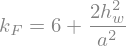

Calculate the $F_{{cr}}$:

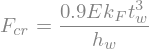

Calculate $m_1$

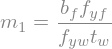

Calculate $m_2$

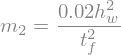

Calculate $l_y$

Calculate $F_y$

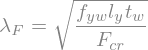

                                      1/2
      ⎛                            -1⎞   
λ_F = ⎝0.015⋅0.639⋅355000.0⋅1.37e+4  ⎠   

In this case $\lambda_F=$0.498 $< 0.5$, we need to recalculate $m_2=0$

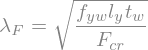

In this case $m_2=0$,  $\lambda_F=$0.494 $< 0.5$, does not satisfy the condition

In [6]:
display(Markdown(f"""Type={Type}"""))
if db['S_S'] < db['a']:
    display(Markdown("""Calculate the $k_F$:"""))
    display(k_F_func(Type))
    display(k_F_func(Type,**db))
    k_F_val=N(k_F_func(Type,**db).doit(),3)
    display(k_F_val)
    db['k_F']=k_F_val.rhs
    
    #F_cr
    display(Markdown("""Calculate the $F_{{cr}}$:"""))
    display(F_cr_func(Type))
    display(F_cr_func(Type,**db))
    F_cr_val=N(F_cr_func(Type,**db).doit(),3)
    display(F_cr_val)
    db['F_cr']=F_cr_val.rhs
    if db['F_cr'] < db['F_Ed']:
        display(Markdown(f""" $F_{{cr}}$={db['F_cr']} < $F_{{Ed}}$={db['F_Ed']}. FIN! La estructura no cumple frente a patch loading"""))
    else:
        display(Markdown("""Calculate $m_1$"""))
        display(m_1_func(Type))
        display(m_1_func(Type,**db))
        m_1_val=N(m_1_func(Type,**db).doit(),3)
        display(m_1_val)
        db['m_1']=m_1_val.rhs
        display(Markdown(f"""Calculate $m_2$"""))
        display(m_2_func(Type))
        display(m_2_func(Type,**db))
        m_2_val=N(m_2_func(Type,**db).doit(),3)
        display(m_2_val)
        db['m_2']=m_2_val.rhs
        
        if Type=="C":
            display(Markdown(f"""Calculate $l_e$ when for type 'C' """))
            display(l_e_func(Type))
            display(l_e_func(Type,**db))
            l_e_val=N(l_e_func(Type,**db).doit(),3)
            display(l_e_val)
            db['l_e']=l_e_val.rhs
        display(Markdown("""Calculate $l_y$"""))
        display(l_y_func(Type))
        display(l_y_func(Type,**db))
        l_y_val=N(l_y_func(Type,**db).doit(),3)
        display(l_y_val)
        db['l_y']=l_y_val.rhs
        display(Markdown(f"""Calculate $F_y$"""))
        display(F_y_func(Type))
        display(F_y_func(Type,**db))
        F_y_val=N(F_y_func(Type,**db).doit(),3)
        display(F_y_val)
        db['F_y']=F_y_val.rhs
        if db['F_y'] < db['F_Ed']:
            display(Markdown(f"""$F_y=${db['F_y']} < $F_Ed=${db['F_Ed']}. FIN! La estructura no cumple frente a patch loading"""))

        display(lambda_F_func(Type))
        display(lambda_F_func(Type,**db))
        lambda_F_val=N(lambda_F_func(Type,**db).doit(),3)
        display(lambda_F_val)
        db['lambda_F']=lambda_F_val.rhs
        
        if db['lambda_F']<=0.5:
            display(Markdown(f"""In this case $\lambda_F=${db['lambda_F']} $< 0.5$, we need to recalculate $m_2=0$"""))
            del db['m_2']
            if 'l_e' in db.keys():
                del db['l_e']
            del db['l_y']
            del db['F_y']
            del db['lambda_F']
            display(Eq(m_2,0))
            db['m_2']=0
            if Type=="C":
                display(l_e_func(Type))
                display(l_e_func(Type,**db))
                l_e_val=N(l_e_func(Type,**db).doit(),3)
                display(l_e_val)
                db['l_e']=l_e_val.rhs

            display(l_y_func(Type))
            display(l_y_func(Type,**db))
            l_y_val=N(l_y_func(Type,**db).doit(),3)
            display(l_y_val)
            db['l_y']=l_y_val.rhs

            display(F_y_func(Type))
            #display(F_y_func(Type,**db))
            F_y_val=N(F_y_func(Type,**db).doit(),3)
            display(F_y_val)
            db['F_y']=F_y_val.rhs
            if db['F_y'] < db['F_Ed']:
                display(Markdown(f"""$F_y=${db['F_y']} < $F_{{Ed}}=${db['F_Ed']}. FIN! La estructura no cumple frente a patch loading"""))

            display(lambda_F_func(Type))
           #display(lambda_F_func(Type,**db))
            lambda_F_val=N(lambda_F_func(Type,**db).doit(),3)
            display(lambda_F_val)
            db['lambda_F']=lambda_F_val.rhs
            if db['lambda_F']<=0.5:
                display(Markdown(f"""In this case $m_2=0$,  $\lambda_F=${db['lambda_F']} $< 0.5$, does not satisfy the condition"""))
            else:
                display(Markdown(f"""Calculate $\chi_F$:"""))
                display(chi_F_func(Type))
                display(chi_F_func(Type,**db))
                chi_F_val=N(chi_F_func(Type,**db).doit(),3)
                display(chi_F_val)
                db['chi_F']=chi_F_val.rhs
                
                display(Markdown(f"""Calculate $F_{{Rd}}$:"""))
                display(F_Rd_func(Type))
                display(F_Rd_func(Type,**db))
                F_Rd_val=N(F_Rd_func(Type,**db).doit(),3)
                display(F_Rd_val)
                db['F_Rd']=F_Rd_val.rhs
                if db['F_Rd']<db['F_Ed']:
                    display(Markdown( f"""$F_{{Rd}}$={db['F_Rd']}<$F_{{Ed}}=${db['F_Ed']}. FIN! La estructura no cumple frente a patch loading"""))
                else:
                    print(f"Calculate $\eta_2$ ")
                    display(eta_2_func(Type))
                    display(eta_2_func(Type,**db))
                    eta_2_val=N(eta_2_func(Type,**db).doit(),3)
                    display(eta_2_val)
                    db['eta_2']=eta_2_val.rhs      

        else:
            display(Markdown(f"""Calculate $\chi_F$:"""))
            display(chi_F_func(Type))
            display(chi_F_func(Type,**db))
            chi_F_val=N(chi_F_func(Type,**db).doit(),3)
            display(chi_F_val)
            db['chi_F']=chi_F_val.rhs

            display(Markdown(f"""Calculate $F_{{Rd}}$:"""))
            display(F_Rd_func(Type))
            display(F_Rd_func(Type,**db))
            F_Rd_val=N(F_Rd_func(Type,**db).doit(),3)
            display(F_Rd_val)
            db['F_Rd']=F_Rd_val.rhs


            if db['F_Rd']<db['F_Ed']:
                display(Markdown( f"""$F_{{Rd}}$={db['F_Rd']}<$F_{{Ed}}=${db['F_Ed']}. FIN! La estructura no cumple frente a patch loading"""))


            display(eta_2_func(Type))
            display(eta_2_func(Type,**db))
            eta_2_val=N(eta_2_func(Type,**db).doit(),3)
            display(eta_2_val)
            db['eta_2']=eta_2_val.rhs
else:
     display(Markdown(f"""FIN! La estructura no cumple frente a patch loading"""))
    
    